[67.30998637]


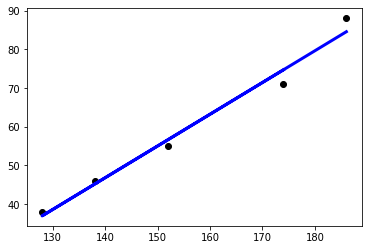

In [1]:
import matplotlib.pylab as plt
from sklearn import linear_model as lm

reg = lm.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X, y) # 학습

print(reg.predict([[165]]))

# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(X, y, color = 'black')

# 삭습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값을 선그래프로 그린다.
# 계산된 기울기와 y절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

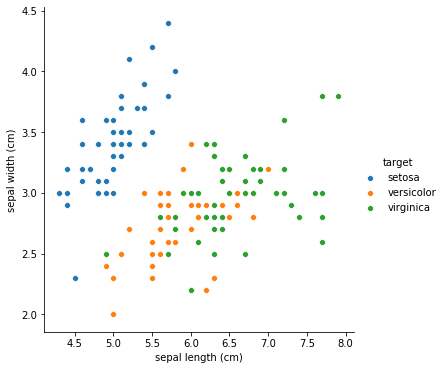

In [2]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 연산을 위해 임포트

# 시각화를 위한 패키지 임포트
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris() # sample data load

print(iris) # 로드된 데이터가 속성-스타일 접근을 제공하는 딕셔너리와 번지 객체로 표현된 것을 확인
print(iris.DESCR) # Description 속성을 이용해서 데이터셋의 정보를 확인

# 각 key에 저장된 value 확인
# feature
print(iris.data)
print(iris.feature_names)

# label
print(iris.target)
print(iris.target_names)

# feature_names와 target을 레코드로 갖는 데이터 프레임 생성
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 맵핑
df['target'] = df['target'].map({0 : "setosa", 1 : "versicolor", 2: "virginica"})
print(df)

# 슬라이싱을 통해 feature와 label 보기
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, [-1]]

sns.pairplot(df, x_vars = ["sepal length (cm)"], y_vars = ["sepal width (cm)"], hue = "target", height = 5)

In [3]:
# (80:20)으로 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

# 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9736842105263158


In [4]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# 0 = setosa, 1 = versicolor, 2 = virginica
classes = {0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자.
x_new = [[3, 4, 5, 2], 
         [5, 4, 2, 2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


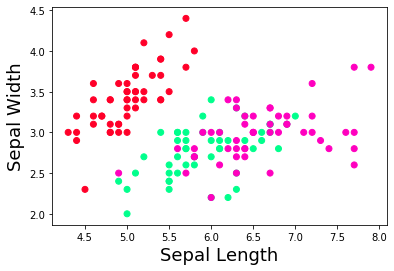

In [5]:
# 필요한 라이브러리 임포트
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 로드
iris = datasets.load_iris()

# 입력(X)와 출력(y) or target
X = iris.data[:, :2]
y = iris.target

# 데이터 살펴보기
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)

# K-Means 클러스터링
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)
km.fit(X)   # 학습

# 중심점 위치
centers = km.cluster_centers_
print(centers)
